In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import style
plt.style.use('bmh')
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
import pandas as pd
import time
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from numpy.linalg import matrix_power
from IPython import display
import control
from collections import deque
import pickle
from Utilities.ParticleFilter import *
from Utilities.sqrtm import sqrtm
from Utilities.Dynamics_Constraints_Controller import *
from Utilities.StateSelectionAlgorithm import StateSelectionAlgorithm

saveFigs = True
FigWidth = 3.0
FigHeight = 1.5

In [2]:
x0 = np.random.randn(rx,1)
Cov0 = 0.5 * np.diag(np.ones(rx,))
num_particles = 300
Pred_Horizon_N = 6
number_of_simulations = 100
LangrangeMultp = 1000
SSA =  StateSelectionAlgorithm(x0, Cov0, num_particles, stateDynamics, measurementDynamics, Q, R,
                 Pred_Horizon_N, Controller, number_of_simulations, CostAndConstraints, LangrangeMultp)
SSA.initialize(x0, Cov0)

In [4]:
SSA.StateSelector()

array([[-0.13473635],
       [-0.8019726 ]])

In [5]:
SSA.sampleAverage()

array([-4.24933456e-04, -2.02167365e+00])

In [6]:
x0

array([[-0.03662736],
       [-2.00667636]])

In [ ]:
A = np.random.rand(5,)
C = np.random.rand(5,1)
np.append(A, False)

array([0.66209896, 0.66723631, 0.77210591, 0.17455692, 0.81270836,
       0.        ])

In [ ]:
# A function to prepare the figure, its size, and plot the constraints set.
def Constraintsplot():
    rectangle = plt.Rectangle((-2,-7), 7, 3, fc='None',ec="grey", hatch='xx',zorder=0)
    plt.gca().add_patch(rectangle)
    rectangle = plt.Rectangle((3,-4), 2, 6, fc='None',ec="grey", hatch='xx',zorder=0)
    plt.gca().add_patch(rectangle)
    plt.axis('scaled')
    pass

0
1


KeyboardInterrupt: 

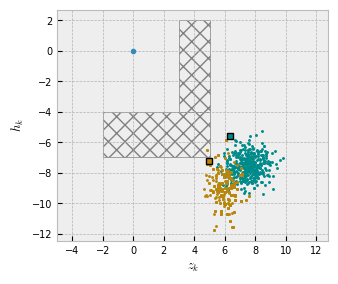

In [ ]:
fig= plt.figure(figsize=(FigWidth,FigHeight))
Constraintsplot()
plt.axis('equal')
plt.xlabel('$x_k^1$', fontsize=9)  
plt.ylabel('$x_k^2$', fontsize=9) 
plt.rc( 'text', usetex=True )
N=5 #The horizon length (minus one, since N+1 step will be evaluated in the code)
L=400 #The number of particles in $\Xi$
M=135 #Number of simulations for statistical feasibility check
alpha=0.1
Ulim=3
T=30


var_x0=np.diag(np.array([0.5,0.5]))
mu_x0=np.array([[7.5,-7.5]]).T
#mu_x0=np.array([[7,0]]).T
var_w=np.diag(np.array([0.3,0.3]))
var_v=np.diag(np.array([0.3,0.3]))
Xi0=mu_x0+np.sqrt(var_x0)@np.random.randn(2, L)
x_true=np.full((2,T+1), np.nan)
x_true[:,0]=(mu_x0+np.sqrt(var_x0)@np.random.randn(2, 1)).reshape(2,)
Xi=Xi0+0
AlphaAchieved=np.full((1,T+1), np.nan)
t = time.time()
for k in range(T):
    print(k)
    AlphaAchieved[0,k]=AchievedAlpha(Xi)
    x0star=StateSelector(N,M,L,alpha,Xi,var_w)
    plt.plot(Xi[0,:],Xi[1,:],'o', markersize=1.1,color=list(colors.cnames)[k+22], zorder=2)
    plt.plot(x0star[0],x0star[1],marker='s',ms=4, color = 'black' ,mfc=list(colors.cnames)[k+22], zorder=3)
    u=controller(x0star)
    Xiplus, gx=TimeUpdate(Xi,var_w,var_v,u)
    y=x_true[0,k]+np.sqrt(var_v)[0,0]*np.random.randn()
    disturbance_k=np.sqrt(var_w)@np.random.randn(2, 1)
    x_true[:,k+1]=(dynamics(x_true[:,k],u,disturbance_k)).reshape(2,)
    Likelihoods=Measurement_Likelihood(np.array([gx]),y,var_v[0,0])
    Xi=Resampler(Xiplus,Likelihoods)
    plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
    plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
    plt.savefig('L_example_SS.pdf',bbox_inches ="tight")

AlphaAchieved[0,T]=AchievedAlpha(Xi)  
print('Computation Time =',time.time()-t)    


plt.show()




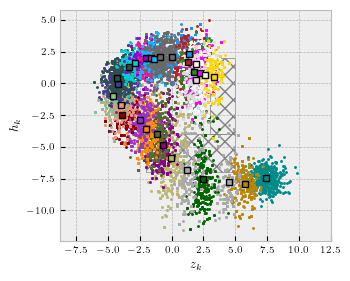

In [ ]:
#With particle filter conditional mean
Constraintsplot()
#x=[2,4,4,-2,-2,2,2]
#y=[4,4,-6,-6,-4,-4,4]
#plt.plot(x,y)
plt.plot(0,0,'.')
AlphaAchievedCM=np.full((1,T+1), np.nan)
plt.axis('equal')
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
plt.xlabel('$z_k$', fontsize=9)  
plt.ylabel('$h_k$', fontsize=9) 
#plt.xlabel('$z_k^{\prime\prime}$')  
#plt.ylabel('$h_k^{\prime\prime}$') 
Xi=Xi0
x_true=np.full((2,T+1), np.nan)
x_true[:,0]=(mu_x0+np.sqrt(var_x0)@np.random.randn(2, 1)).reshape(2,)
for k in range(T):
    AlphaAchievedCM[0,k]=AchievedAlpha(Xi)
    x0mean=np.sum(Xi, axis=1)/L
    plt.plot(Xi[0,:],Xi[1,:],'o', markersize=1.1,color=list(colors.cnames)[k+22],zorder=2)
    plt.plot(x0mean[0],x0mean[1],marker='s',ms=4, color = 'black' ,mfc=list(colors.cnames)[k+22], zorder=3)
    u=controller(x0mean)
    Xiplus, gx=TimeUpdate(Xi,var_w,var_v,u)
    y=x_true[0,k]+np.sqrt(var_v)[0,0]*np.random.randn()
    disturbance_k=np.sqrt(var_w)@np.random.randn(2, 1)
    x_true[:,k+1]=(dynamics(x_true[:,k],u,disturbance_k)).reshape(2,)
    Likelihoods=Measurement_Likelihood(np.array([gx]),y,var_v[0,0])
    Xi=Resampler(Xiplus,Likelihoods)

AlphaAchievedCM[0,T]=AchievedAlpha(Xi)          
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels
plt.rc('axes', labelsize=7) #fontsize of the x and y labels
plt.savefig('L_example_CM.pdf',bbox_inches ="tight")
plt.show()



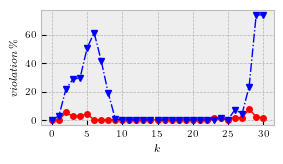

In [ ]:
# Generating the violation rates figure
plt.style.use('bmh')
plt.figure(figsize=(3.0,1.5))
plt.plot(AlphaAchieved[0,:]*100,'-or', linewidth=1, ms=4)
plt.plot(AlphaAchievedCM[0,:]*100,'-.vb', linewidth=1, ms=4)
plt.rc('xtick', labelsize=7) #fontsize of the x tick labels
plt.rc('ytick', labelsize=7) #fontsize of the y tick labels

plt.xlabel('$k$', fontsize=8)  
plt.ylabel('$violation\,\%$', fontsize=8) 
plt.savefig('AchievedAlpha_StabilizingK.pdf',bbox_inches ="tight")

plt.show()